# <span style="color:#DC143C">Know your data</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

lakers_purple = '#552583'
lakers_orange = '#FDB927'

<font size = "6"> Data Loading </font>

In [2]:
#!ls

In [3]:
data1 = pd.read_csv("kobe_shots.csv")
data = data1.copy()

<font size = "6"> Feature Engineering </font> 

In [4]:
data.head()


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [6]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


<font size = "5"> Removing nulls </font> 

In [7]:
kaggle_test_set = data[pd.isnull(data['shot_made_flag'])] 
data = data[pd.notnull(data['shot_made_flag'])]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           25697 non-null  object 
 16  shot_zone

<font size = "5"> Removing obvious columns </font> 

In [9]:
features_to_drop = ['team_id', 'team_name', 'game_date']
data = data.drop(['game_event_id'], axis = 1)
print(len(data.columns))
data.columns
data = data.drop(['team_id'], axis=1)
data = data.drop(['team_name'], axis=1)
data = data.drop(['game_date'], axis=1)
print(len(data.columns))

24
21


<font size = "5"> minutes_remaining, seconds_remaining ---> seconds_remaining </font> 

In [ ]:
#minutes_remaining represents the number of minutes until the end of quarter and seconds_remaining represents the number of seconds until the end of quarter. We can merge this into one column: remaining seconds until end of quarter.

In [10]:
data['remaining_time'] = 60*data['minutes_remaining'] + data['seconds_remaining']

In [11]:
data['remaining_time'].describe()

count    25697.000000
mean       321.519321
std        208.311076
min          0.000000
25%        141.000000
50%        304.000000
75%        499.000000
max        714.000000
Name: remaining_time, dtype: float64

In [12]:
#features_to_drop.extend(['minutes_remaining', 'seconds_remaining'])
data = data.drop(['minutes_remaining'], axis=1)
data = data.drop(['seconds_remaining'], axis=1)
data = data.drop(['game_id'], axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   lat                 25697 non-null  float64
 3   loc_x               25697 non-null  int64  
 4   loc_y               25697 non-null  int64  
 5   lon                 25697 non-null  float64
 6   period              25697 non-null  int64  
 7   playoffs            25697 non-null  int64  
 8   season              25697 non-null  object 
 9   shot_distance       25697 non-null  int64  
 10  shot_made_flag      25697 non-null  float64
 11  shot_type           25697 non-null  object 
 12  shot_zone_area      25697 non-null  object 
 13  shot_zone_basic     25697 non-null  object 
 14  shot_zone_range     25697 non-null  object 
 15  matchup             25697 non-null  object 
 16  opponent 

<font size = "5"> Shot & Action Type </font> 

In [ ]:
#action_type, combined_shot_type and shot_type looks coorelated. Lets check unique values thay can take:

In [14]:
print(len(data.action_type.unique()))
print(data.action_type.unique())
print("******************************************************")
print(data.shot_type.unique())
print("******************************************************")
print()
print(data.combined_shot_type.unique())
print("******************************************************")
print()

55
['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'
 'Putback Layup Shot' 'Putback 

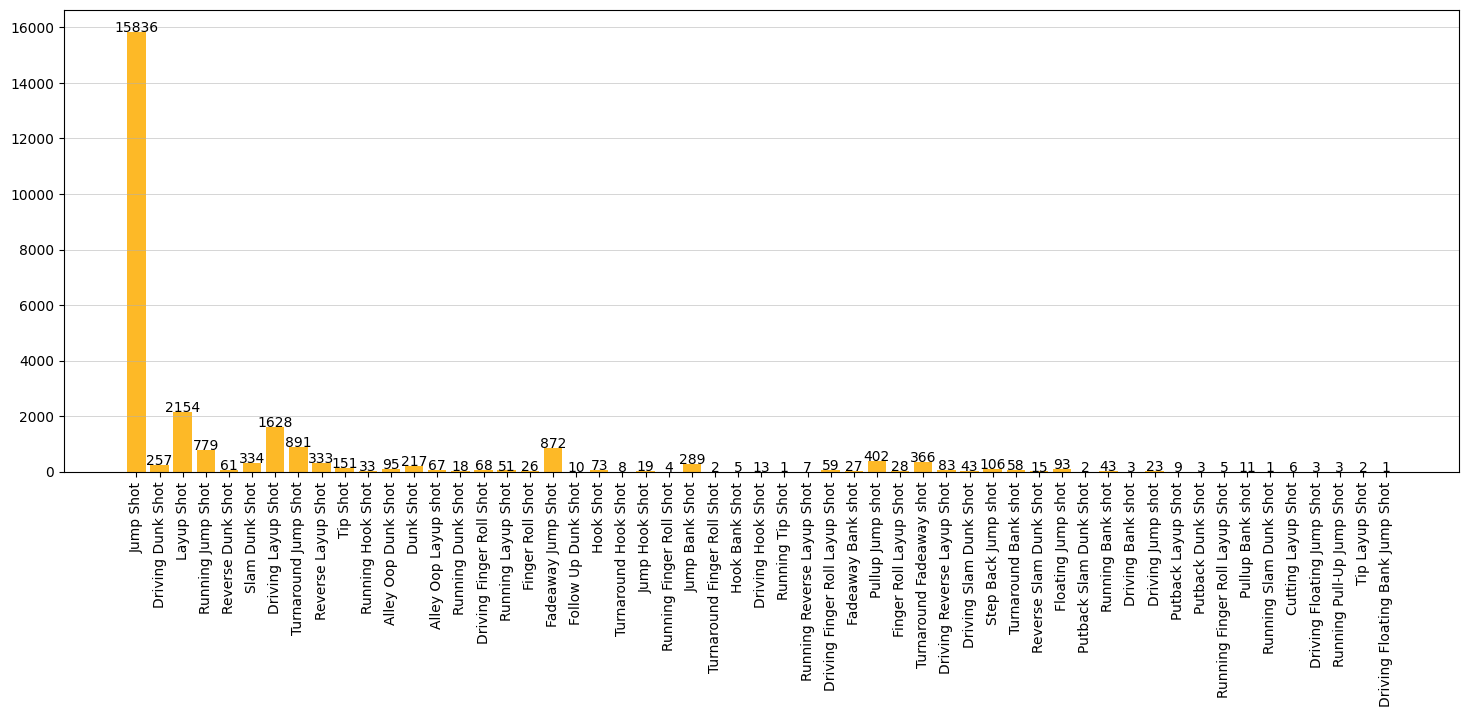

In [15]:
#Visualisation of frequency of different action_type

X = data.action_type.unique()
dict = {}
for item in X:
    dict[item] = sum(data['action_type'] == item)
values = list(dict.values())
plt.figure(figsize = (18, 6))
plt.bar(X, list(dict.values()), color = lakers_orange)
plt.xticks(np.arange(len(X)), X, rotation = 'vertical')
plt.grid(axis = 'y', linewidth = 0.37)

for i, v in enumerate(values):
    plt.text(i, v + 1, str(v), ha='center')

plt.show()
count_smaller_than_60 = sum(map(lambda x: x < 60, dict.values()))

# print(count_smaller_than_60)
#TODO: sortiranje po argumentima: np.argsort

In [ ]:
#Mergeing all action_type with frequency smaller that 60 into one: 'Other'

In [16]:
########################################################!!!!!!!!!!!!!!!!!!!!!!!!!!!
counts = data['action_type'].value_counts()
data['Frequency'] = data['action_type'].map(counts)
data_sorted = data.sort_values(by='Frequency', ascending=True)
print(data_sorted[['action_type', 'Frequency']].head(20))
#sorted_data = data.sort_values(by = "action_type")
data.loc[data['Frequency'] < 60, 'action_type'] = 'Other'

                           action_type  Frequency
22392  Driving Floating Bank Jump Shot          1
20707           Running Slam Dunk Shot          1
7603                  Running Tip Shot          1
8692       Turnaround Finger Roll Shot          2
5728       Turnaround Finger Roll Shot          2
12003           Putback Slam Dunk Shot          2
12001           Putback Slam Dunk Shot          2
22572                   Tip Layup Shot          2
22319                   Tip Layup Shot          2
21916       Driving Floating Jump Shot          3
13258                Putback Dunk Shot          3
22060       Driving Floating Jump Shot          3
22711        Running Pull-Up Jump Shot          3
22513       Driving Floating Jump Shot          3
15852                Putback Dunk Shot          3
13925                Driving Bank shot          3
17733                Driving Bank shot          3
28078                Putback Dunk Shot          3
12534                Driving Bank shot          3


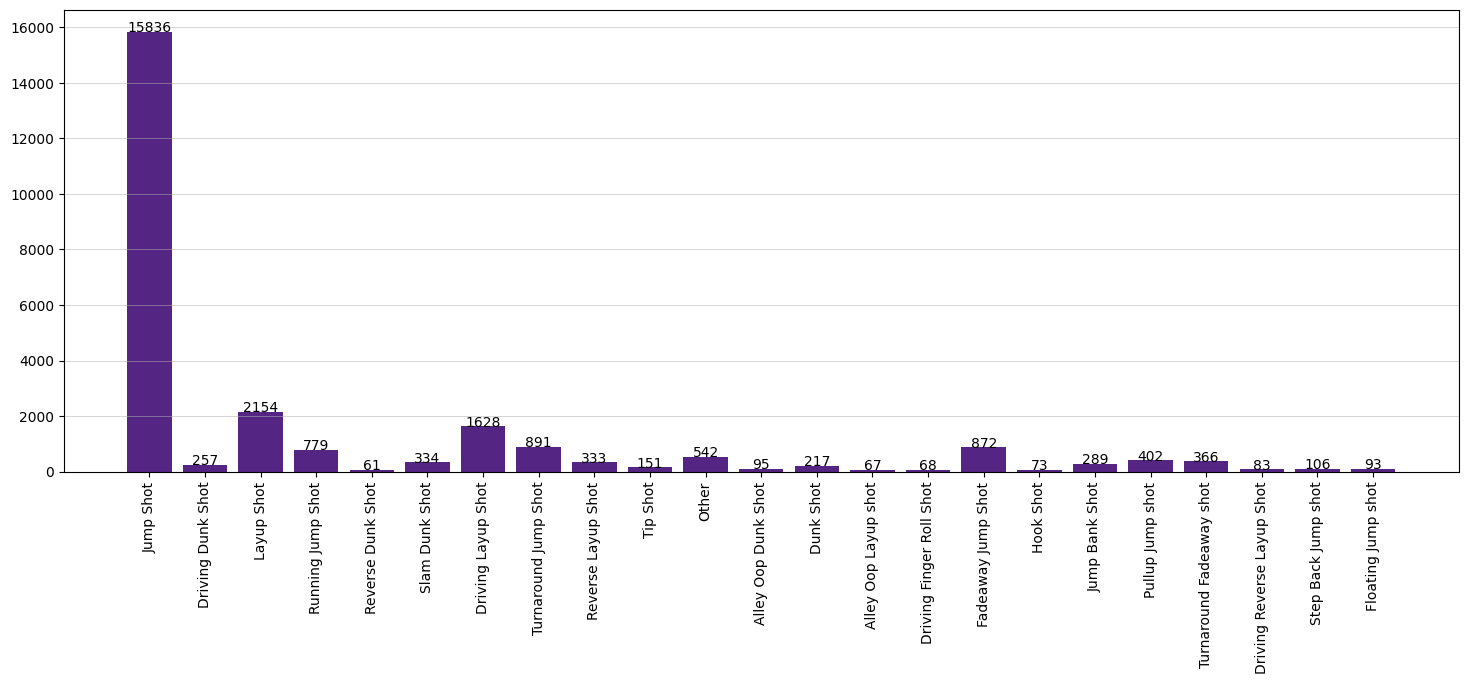

4


In [17]:
#Visualization of remaining action_type
#################################################################!!!!!!!!!!
X = data.action_type.unique()
dict = {}
for item in X:
    dict[item] = sum(data['action_type'] == item)
values = list(dict.values())
plt.figure(figsize = (18, 6))
plt.bar(X, list(dict.values()), color = lakers_purple)
plt.xticks(np.arange(len(X)), X, rotation = 'vertical')
plt.grid(axis = 'y', linewidth = 0.37)

for i, v in enumerate(values):
    plt.text(i, v + 1, str(v), ha='center')

plt.show()
count_smaller_than_60 = sum(map(lambda x: x < 74, dict.values()))

print(count_smaller_than_60)
#TODO: sortiranje po argumentima: np.argsort
    

In [18]:
sum(data['action_type'] == 'Jump Shot')

15836

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   lat                 25697 non-null  float64
 3   loc_x               25697 non-null  int64  
 4   loc_y               25697 non-null  int64  
 5   lon                 25697 non-null  float64
 6   period              25697 non-null  int64  
 7   playoffs            25697 non-null  int64  
 8   season              25697 non-null  object 
 9   shot_distance       25697 non-null  int64  
 10  shot_made_flag      25697 non-null  float64
 11  shot_type           25697 non-null  object 
 12  shot_zone_area      25697 non-null  object 
 13  shot_zone_basic     25697 non-null  object 
 14  shot_zone_range     25697 non-null  object 
 15  matchup             25697 non-null  object 
 16  opponent 

<font size = "5"> What is lat, loc_x, loc_y, lon ? </font> 

In [21]:
data[['lat', 'loc_x','loc_y', 'lon']].describe()

,lat,loc_x,loc_y,lon
count,25697.000000,25697.000000,25697.000000,25697.000000
mean,33.953043,7.148422,91.257345,-118.262652
std,0.088152,110.073147,88.152106,0.110073
min,33.253300,-250.000000,-44.000000,-118.519800
25%,33.884300,-67.000000,4.000000,-118.336800
50%,33.970300,0.000000,74.000000,-118.269800
75%,34.040300,94.000000,160.000000,-118.175800
max,34.088300,248.000000,791.000000,-118.021800


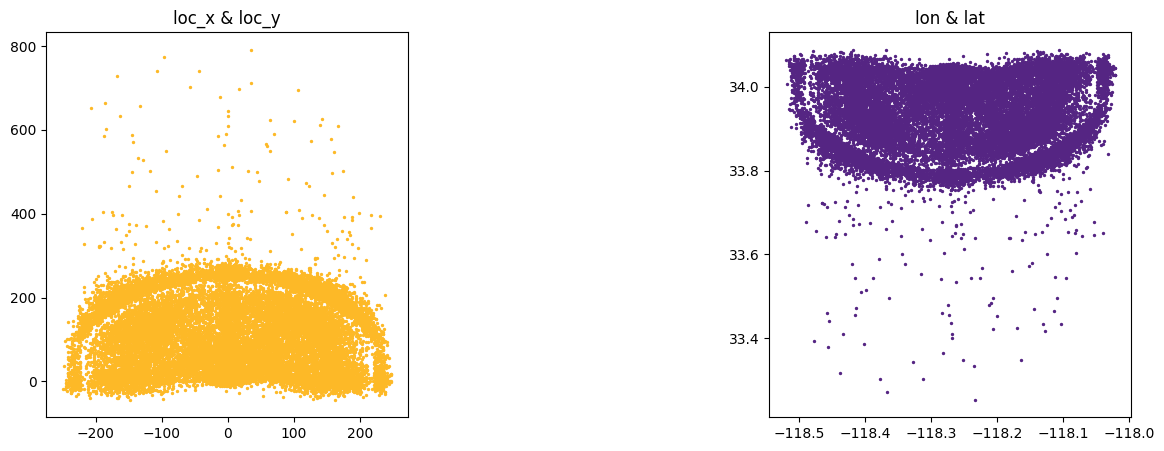

In [22]:
#TODO
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(data.loc_x,data.loc_y, s=2, color = lakers_orange)
plt.title('loc_x & loc_y')

plt.subplot(1,2,2)
plt.scatter(data.lon,data.lat, s=2, color = lakers_purple)
plt.title('lon & lat')

plt.subplots_adjust(wspace=1)

plt.show()


In [ ]:
#Looks like they are same, the only difference is a view side and metrics so we can drop (loc_x, loc_y) or (lon,lat) 

In [23]:
data = data.drop(['lon'], axis=1)
data = data.drop(['lat'], axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   loc_x               25697 non-null  int64  
 3   loc_y               25697 non-null  int64  
 4   period              25697 non-null  int64  
 5   playoffs            25697 non-null  int64  
 6   season              25697 non-null  object 
 7   shot_distance       25697 non-null  int64  
 8   shot_made_flag      25697 non-null  float64
 9   shot_type           25697 non-null  object 
 10  shot_zone_area      25697 non-null  object 
 11  shot_zone_basic     25697 non-null  object 
 12  shot_zone_range     25697 non-null  object 
 13  matchup             25697 non-null  object 
 14  opponent            25697 non-null  object 
 15  shot_id             25697 non-null  int64  
 16  remaining

<font size = "5"> Shot type & zones visualisation </font> 

In [25]:
print(data['shot_type'].unique())
print(data['shot_zone_area'].unique())
print(data['shot_zone_basic'].unique())
print(data['shot_zone_range'].unique())

['2PT Field Goal' '3PT Field Goal']
['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']
['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']


In [26]:
#TODO: visualize and handle this

<font size = "5"> Is matchup == opponent ? </font> 

In [27]:
data[['matchup', 'opponent']].head()

,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR


In [28]:
opponents = list(data['opponent'].unique())
print(len(opponents))

matchups = list(data['matchup'].unique())
print(len(matchups))

#Interesantno, nije isti broj... Zasto?

matchups.sort()
print(matchups)



33
74
['LAL @ ATL', 'LAL @ BKN', 'LAL @ BOS', 'LAL @ CHA', 'LAL @ CHH', 'LAL @ CHI', 'LAL @ CLE', 'LAL @ DAL', 'LAL @ DEN', 'LAL @ DET', 'LAL @ GSW', 'LAL @ HOU', 'LAL @ IND', 'LAL @ LAC', 'LAL @ MEM', 'LAL @ MIA', 'LAL @ MIL', 'LAL @ MIN', 'LAL @ NJN', 'LAL @ NOH', 'LAL @ NOK', 'LAL @ NOP', 'LAL @ NYK', 'LAL @ OKC', 'LAL @ ORL', 'LAL @ PHI', 'LAL @ PHO', 'LAL @ PHX', 'LAL @ POR', 'LAL @ SAC', 'LAL @ SAS', 'LAL @ SEA', 'LAL @ TOR', 'LAL @ UTA', 'LAL @ UTH', 'LAL @ VAN', 'LAL @ WAS', 'LAL vs. ATL', 'LAL vs. BKN', 'LAL vs. BOS', 'LAL vs. CHA', 'LAL vs. CHH', 'LAL vs. CHI', 'LAL vs. CLE', 'LAL vs. DAL', 'LAL vs. DEN', 'LAL vs. DET', 'LAL vs. GSW', 'LAL vs. HOU', 'LAL vs. IND', 'LAL vs. LAC', 'LAL vs. MEM', 'LAL vs. MIA', 'LAL vs. MIL', 'LAL vs. MIN', 'LAL vs. NJN', 'LAL vs. NOH', 'LAL vs. NOK', 'LAL vs. NOP', 'LAL vs. NYK', 'LAL vs. OKC', 'LAL vs. ORL', 'LAL vs. PHI', 'LAL vs. PHO', 'LAL vs. PHX', 'LAL vs. POR', 'LAL vs. SAC', 'LAL vs. SAN', 'LAL vs. SAS', 'LAL vs. SEA', 'LAL vs. TOR', 'L

In [29]:
count_occurrences_vs = sum(list(map(lambda x: x.count('vs'), matchups)))
count_occurrences_at = sum(list(map(lambda x: x.count('@'), matchups)))
count_occurrences_vs, count_occurrences_at

#for opp in opponents:
#    print(f"{opp} : {sum(list(map(lambda x: x.count(opp), matchups)))}")

l = []
for matchup in matchups:
    index = matchup.find("@ ")
    if index != -1:
        l.append(matchup[index+2:])
print(l)
print(len(l))

diff = [item for item in l if item not in opponents]
print(diff)

#Ajde da vidimo o cemu se ovde radi::

filtered_df = data[data['matchup'] == "LAL @ CHH"]
#print(filtered_df[['matchup', 'opponent']])


['ATL', 'BKN', 'BOS', 'CHA', 'CHH', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'PHX', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'UTH', 'VAN', 'WAS']
37
['CHH', 'NOK', 'PHO', 'UTH']


In [30]:
contains_vs = lambda x: int("vs" in x)
result_list = list(map(contains_vs, data["matchup"]))
#print(result_list)
data["home_court"] = result_list


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   loc_x               25697 non-null  int64  
 3   loc_y               25697 non-null  int64  
 4   period              25697 non-null  int64  
 5   playoffs            25697 non-null  int64  
 6   season              25697 non-null  object 
 7   shot_distance       25697 non-null  int64  
 8   shot_made_flag      25697 non-null  float64
 9   shot_type           25697 non-null  object 
 10  shot_zone_area      25697 non-null  object 
 11  shot_zone_basic     25697 non-null  object 
 12  shot_zone_range     25697 non-null  object 
 13  matchup             25697 non-null  object 
 14  opponent            25697 non-null  object 
 15  shot_id             25697 non-null  int64  
 16  remaining

In [32]:
data[["matchup", "home_court"]].head(11)

,matchup,home_court
1,LAL @ POR,0
2,LAL @ POR,0
3,LAL @ POR,0
4,LAL @ POR,0
5,LAL @ POR,0
6,LAL @ POR,0
8,LAL @ POR,0
9,LAL @ POR,0
10,LAL @ POR,0
11,LAL vs. UTA,1


In [33]:
data = data.drop(['matchup'], axis=1)

<font size = "5"> Shot Distance </font> 

In [34]:
data["shot_distance"].unique()

array([15, 16, 22,  0, 14, 12, 25, 17,  9,  5, 20, 18, 11,  7, 26, 19,  8,
       13, 27,  1, 24, 23,  4, 21, 47, 10, 29, 28, 42,  3, 48, 30, 45,  2,
        6, 33, 36, 62, 31, 70, 43, 38, 60, 37, 40, 32, 56, 35, 55, 51, 68,
       39, 41, 64, 50, 54, 74, 44, 61, 65, 59, 34, 63, 49, 46, 58, 69, 57,
       53, 67, 71, 52, 77, 79], dtype=int64)

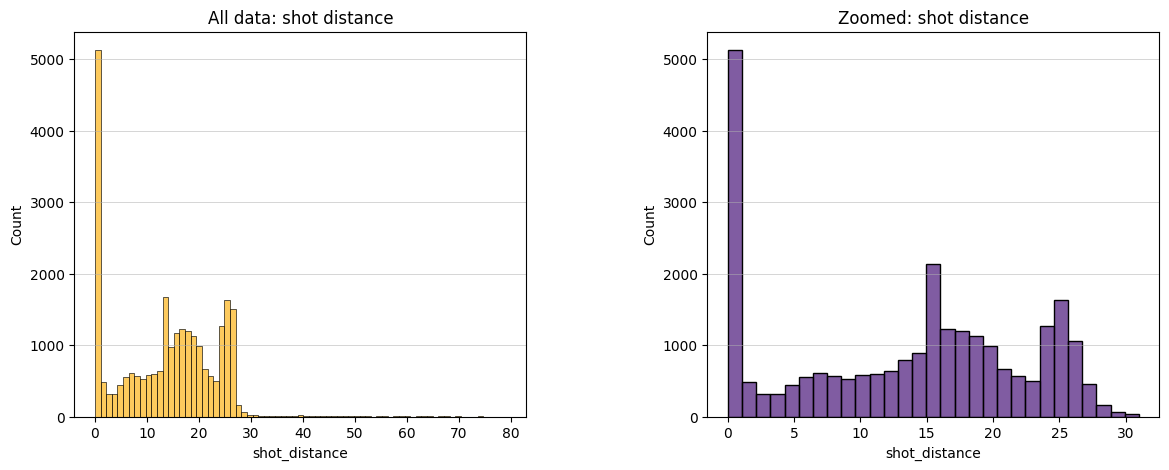

In [35]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data=data, x="shot_distance", color = lakers_orange)
plt.title('All data: shot distance')
plt.grid(axis = 'y', linewidth = 0.37)

plt.subplot(1,2,2)
sns.histplot(data=data[data["shot_distance"] < 32], x="shot_distance", color = lakers_purple)
plt.title('Zoomed: shot distance')
plt.grid(axis = 'y', linewidth = 0.37)
plt.subplots_adjust(wspace=0.4)

plt.show()

In [ ]:
#Linija za 3 pt u NBA je na rastojanju oko 23 feets tako da ovo odgovara odaljenosti u feets prilikom suta. Kako vec imamo loc_x, loc_y kolone kao x i y koordinate sa kojih je gadjana, ovo nam je nepotrebno, dakle mozemo da dropujemo ovu kolonu.

In [36]:
data = data.drop(['shot_distance'], axis=1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   loc_x               25697 non-null  int64  
 3   loc_y               25697 non-null  int64  
 4   period              25697 non-null  int64  
 5   playoffs            25697 non-null  int64  
 6   season              25697 non-null  object 
 7   shot_made_flag      25697 non-null  float64
 8   shot_type           25697 non-null  object 
 9   shot_zone_area      25697 non-null  object 
 10  shot_zone_basic     25697 non-null  object 
 11  shot_zone_range     25697 non-null  object 
 12  opponent            25697 non-null  object 
 13  shot_id             25697 non-null  int64  
 14  remaining_time      25697 non-null  int64  
 15  Frequency           25697 non-null  int64  
 16  home_cour

<font size = "5"> Season </font> 

In [38]:
data['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [ ]:
#Transformisacemo data['season'] u prvu godinu u sezoni (da bi radili sa brojevima a ne stringovima)

In [39]:
year = lambda x: x.split("-", 1)[0]
data['season'] = list(map(year, data["season"]))
data['season'].unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '1996', '1997', '1998', '1999'], dtype=object)

Text(0.5, 1.0, 'Count by seasons')

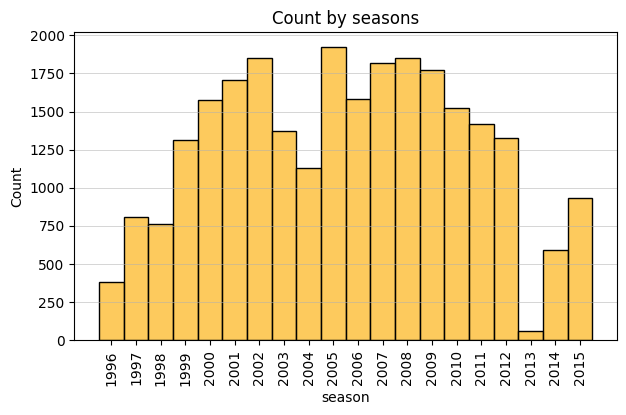

In [40]:
sorted_data = data.sort_values(by = "season")

plt.figure(figsize=(7,4))
ax = sns.histplot(data=sorted_data, x="season", color = lakers_orange)
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.grid(axis = 'y', linewidth = 0.37)
plt.title('Count by seasons')

In [ ]:
#Primetimo da je u sezoni 2013-2014 Kobe odigrao znacajnije manje utakmica. Proveri na netu da li je imao neku povredu tad i koja je bila uspesnost suta do tad i od tad. 

<font size = "5"> Injury </font> 

In [53]:
#On April 12, 2013, Los Angeles Lakers legend Kobe Bryant made two clutch free throws after a torn Achilles injury against the Golden State Warriors,
#literally doing whatever he could to will his team to the playoffs. :)
#We will add atribute 'injury' 

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   loc_x               25697 non-null  int64  
 3   loc_y               25697 non-null  int64  
 4   period              25697 non-null  int64  
 5   playoffs            25697 non-null  int64  
 6   season              25697 non-null  object 
 7   shot_made_flag      25697 non-null  float64
 8   shot_type           25697 non-null  object 
 9   shot_zone_area      25697 non-null  object 
 10  shot_zone_basic     25697 non-null  object 
 11  shot_zone_range     25697 non-null  object 
 12  opponent            25697 non-null  object 
 13  shot_id             25697 non-null  int64  
 14  remaining_time      25697 non-null  int64  
 15  Frequency           25697 non-null  int64  
 16  home_cour

In [42]:

func = lambda x: int(int(x) > int(2012))
result_list = list(map(func, data["season"]))
data['injury'] = result_list

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   loc_x               25697 non-null  int64  
 3   loc_y               25697 non-null  int64  
 4   period              25697 non-null  int64  
 5   playoffs            25697 non-null  int64  
 6   season              25697 non-null  object 
 7   shot_made_flag      25697 non-null  float64
 8   shot_type           25697 non-null  object 
 9   shot_zone_area      25697 non-null  object 
 10  shot_zone_basic     25697 non-null  object 
 11  shot_zone_range     25697 non-null  object 
 12  opponent            25697 non-null  object 
 13  shot_id             25697 non-null  int64  
 14  remaining_time      25697 non-null  int64  
 15  Frequency           25697 non-null  int64  
 16  home_cour

In [44]:
data.injury.unique()

array([0, 1], dtype=int64)

In [45]:
#data.to_csv('output1.csv', index=False)

In [46]:
sum(data['shot_made_flag'])

11465.0

In [47]:
print(data['shot_zone_basic'].unique())
print()
print(data['shot_zone_area'].unique())
print()
print(data['shot_zone_range'].unique())

['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']

['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']

['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']


In [48]:
#################################################!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
data = data.drop(['shot_zone_basic', 'shot_zone_area', 'shot_zone_range', 'Frequency', 'shot_id', 'shot_type' ], axis=1)
#data = data.drop(['shot_zone_basic', 'shot_zone_area', 'shot_zone_range', 'shot_id', 'shot_type' ], axis=1)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   loc_x               25697 non-null  int64  
 3   loc_y               25697 non-null  int64  
 4   period              25697 non-null  int64  
 5   playoffs            25697 non-null  int64  
 6   season              25697 non-null  object 
 7   shot_made_flag      25697 non-null  float64
 8   opponent            25697 non-null  object 
 9   remaining_time      25697 non-null  int64  
 10  home_court          25697 non-null  int64  
 11  injury              25697 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 2.5+ MB


In [50]:
data.to_csv('output1.csv', index=False)